In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [80]:
data = pd.read_csv("Time-Wasters on Social Media.csv")
data.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,Number of Sessions,Video ID,Video Category,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,80,17,4229,Pranks,24,7867,5,26,22,87,Night,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,228,14,2131,Pranks,19,5944,6,25,31,46,Afternoon,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,30,6,4367,Vlogs,19,8674,3,9,7,88,Evening,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,101,19,1507,Vlogs,4,2477,2,6,41,93,Night,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,136,6,2159,Gaming,19,3093,7,13,21,4,Morning,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


### Questions I'm thinking about:

1. What are the featueres that are in common with those with the highest additction level? The lowest addiction level?

2. How does addiction level vary across gender, and profession, across demographics?

3. Are certain plaforms more addictive than others? Why?

4. What is the overall distribution of each feature? 

5. Does more addiction correlate with more debt? Or a higher/lower income?

6. I hypothesise, total time spent, number of sessions, scroll rate, watch reason, will be most correlated with addiciton level.



In [13]:
data.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [96]:
#This is a weird scale
display(sorted(data['Addiction Level'].unique()))
display(sorted(data['Satisfaction'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

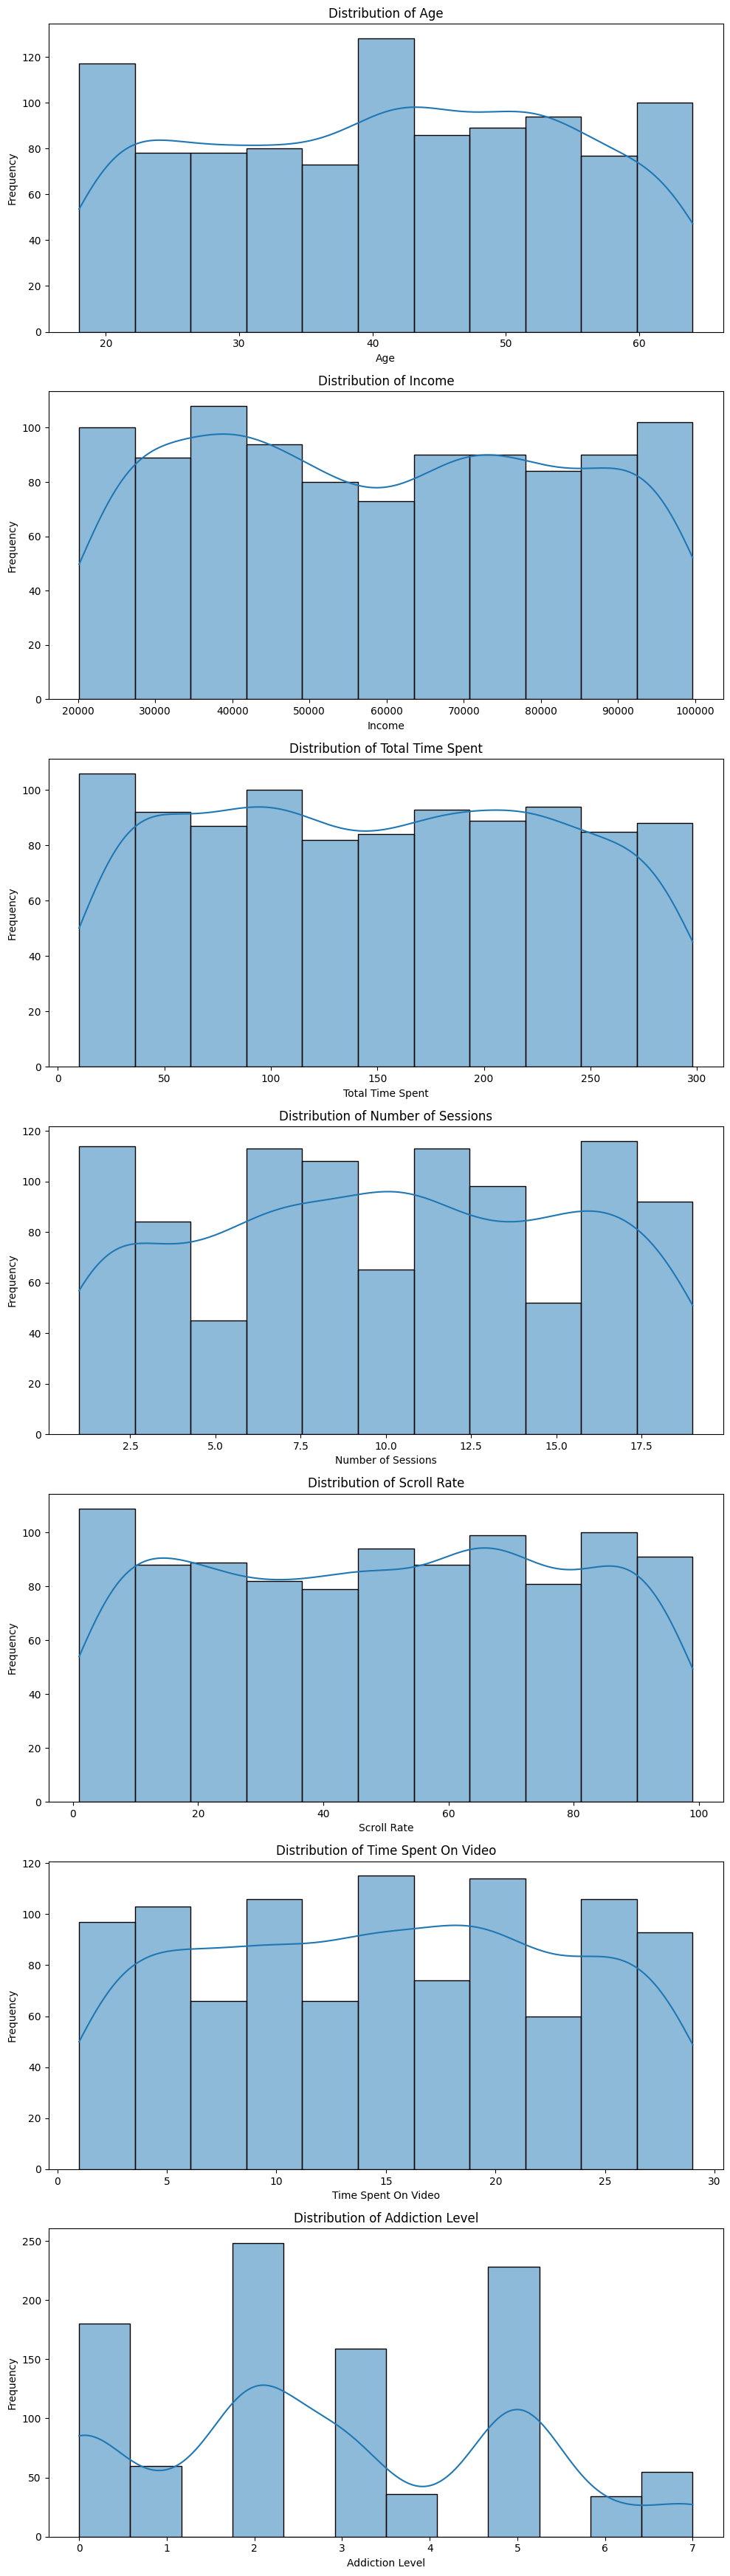

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Age', 'Income', 'Total Time Spent', 'Number of Sessions', 'Scroll Rate', 'Time Spent On Video', 'Addiction Level']

# Set up the figure with one subplot per selected feature
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(10, 5 * len(selected_columns)))

# Loop over each selected column and plot a histogram for the distribution
for i, col in enumerate(selected_columns):
    sns.histplot(data=data[col], ax=axes[i], kde=True)  # Add kde=True to include a kernel density estimate
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')

# Adjust the layout to ensure no overlap
plt.tight_layout()
plt.show()


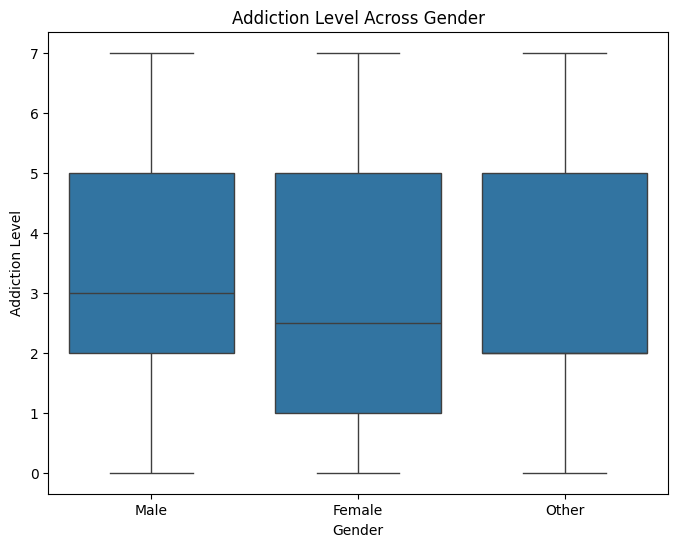

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot of Addiction Level by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Addiction Level', data=data)
plt.title('Addiction Level Across Gender')
plt.xlabel('Gender')
plt.ylabel('Addiction Level')
plt.show()


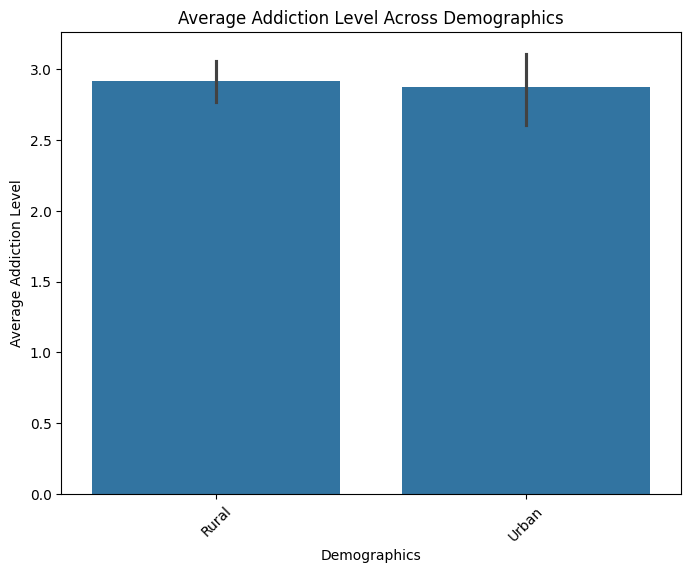

In [29]:
# Bar plot of mean Addiction Level by Demographics
plt.figure(figsize=(8, 6))
sns.barplot(x='Demographics', y='Addiction Level', data=data, estimator='mean')
plt.title('Average Addiction Level Across Demographics')
plt.xlabel('Demographics')
plt.ylabel('Average Addiction Level')
plt.xticks(rotation=45)
plt.show()

/var/folders/61/dxgzpm2j4tn2wtpf92v4yzdh0000gn/T/ipykernel_44020/2060096218.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = data.groupby('Income Bins')['Addiction Level'].mean().reset_index()


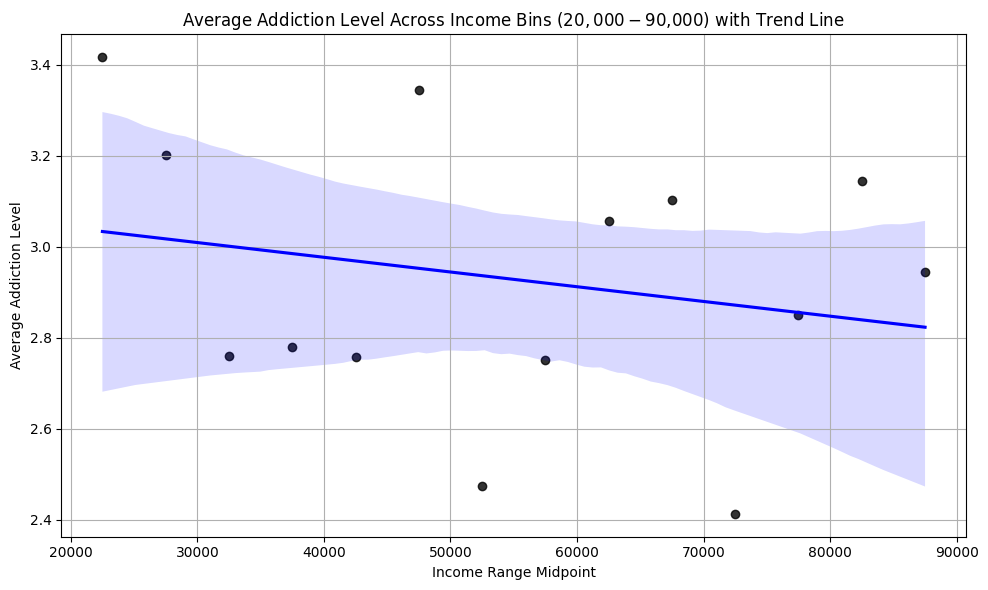

In [40]:
# Define custom bins from 20,000 to 90,000 with 5,000 increments
bins = list(range(20000, 95000, 5000))  # 14 bins from 20,000 to 90,000 (inclusive)
bin_labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]  # Label for each bin range

# Create a new column in the dataframe with income bins
data['Income Bins'] = pd.cut(data['Income'], bins=bins, labels=bin_labels, right=False)

# Group by the Income Bins and calculate the average Addiction Level for each bin
bin_avg = data.groupby('Income Bins')['Addiction Level'].mean().reset_index()

# Convert the Income Bins labels back to numerical values for trend line fitting
bin_avg['Income Midpoint'] = [((bins[i] + bins[i+1]) / 2) for i in range(len(bins)-1)]

# Set up the plot with custom colors and a trend line
plt.figure(figsize=(10, 6))

# Create the scatter plot with a regression line
sns.regplot(x='Income Midpoint', y='Addiction Level', data=bin_avg, scatter_kws={'color': 'black'}, line_kws={'color': 'blue'})

# Customize the plot with titles and labels
plt.title('Average Addiction Level Across Income Bins ($20,000 - $90,000) with Trend Line')
plt.xlabel('Income Range Midpoint')
plt.ylabel('Average Addiction Level')

# Set a grid and make the plot more visually appealing
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [41]:
data['Platform'].unique()

array(['Instagram', 'Facebook', 'YouTube', 'TikTok'], dtype=object)

/var/folders/61/dxgzpm2j4tn2wtpf92v4yzdh0000gn/T/ipykernel_44020/238234911.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Platform', y='Addiction Level', data=platform_avg, palette=palette, ci=None)
/var/folders/61/dxgzpm2j4tn2wtpf92v4yzdh0000gn/T/ipykernel_44020/238234911.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Addiction Level', data=platform_avg, palette=palette, ci=None)


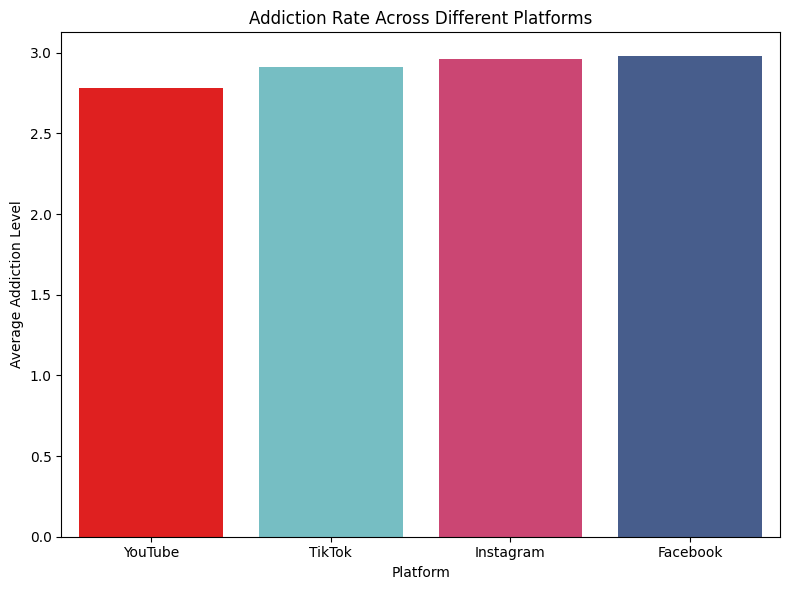

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

platforms = ['Instagram', 'Facebook', 'YouTube', 'TikTok']

# Set custom colors for each platform
palette = {
    'Instagram': '#E1306C',  # Instagram pink
    'Facebook': '#3b5998',   # Facebook blue
    'YouTube': '#FF0000',    # YouTube red
    'TikTok': '#69C9D0'      # TikTok teal
}

# Group by Platform and calculate the average Addiction Level
platform_avg = data.groupby('Platform')['Addiction Level'].mean().reset_index()

# Sort by Addiction Level
platform_avg = platform_avg.sort_values(by='Addiction Level', ascending=True)

# Set up the bar plot without confidence intervals and sorted by addiction level
plt.figure(figsize=(8, 6))
sns.barplot(x='Platform', y='Addiction Level', data=platform_avg, palette=palette, ci=None)

# Customize the plot
plt.title('Addiction Rate Across Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Average Addiction Level')

# Display the plot
plt.tight_layout()
plt.show()


/var/folders/61/dxgzpm2j4tn2wtpf92v4yzdh0000gn/T/ipykernel_44020/146863721.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Profession', y='Addiction Level', data=profession_avg, ci=None, palette='coolwarm', ax=ax1)
/var/folders/61/dxgzpm2j4tn2wtpf92v4yzdh0000gn/T/ipykernel_44020/146863721.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profession', y='Addiction Level', data=profession_avg, ci=None, palette='coolwarm', ax=ax1)
/var/folders/61/dxgzpm2j4tn2wtpf92v4yzdh0000gn/T/ipykernel_44020/146863721.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


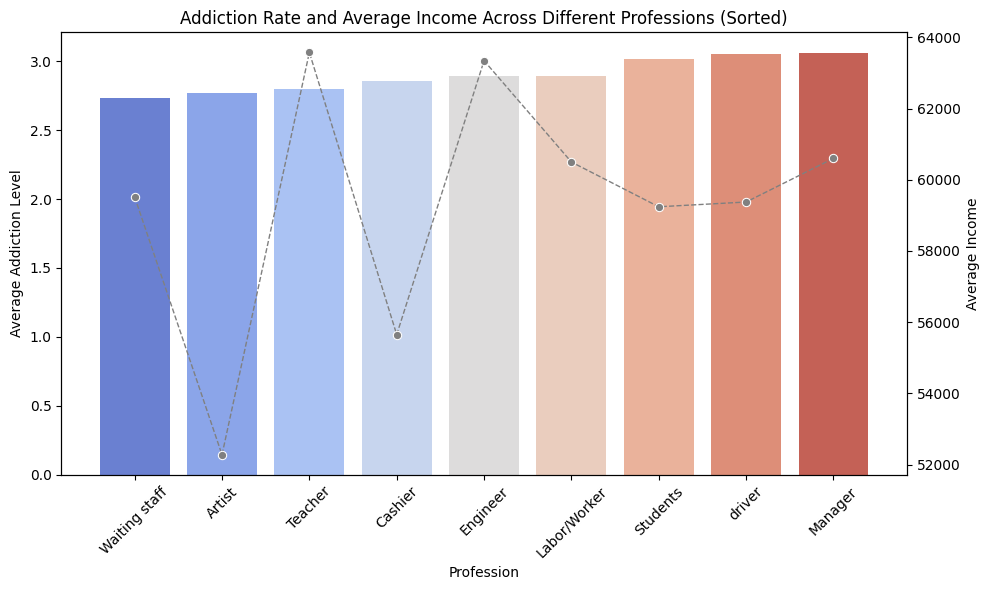

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'data' and it has 'Profession', 'Addiction Level', and 'Income' columns

# Group by Profession and calculate the average Addiction Level and Average Income
profession_avg = data.groupby('Profession').agg({
    'Addiction Level': 'mean',
    'Income': 'mean'
}).reset_index()

# Sort by Addiction Level
profession_avg = profession_avg.sort_values(by='Addiction Level', ascending=True)

# Set up the figure and the first axis (bar plot for Addiction Level)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Addiction Level
sns.barplot(x='Profession', y='Addiction Level', data=profession_avg, ci=None, palette='coolwarm', ax=ax1)

# Customize the first axis (Addiction Level axis)
ax1.set_title('Addiction Rate and Average Income Across Different Professions (Sorted)')
ax1.set_xlabel('Profession')
ax1.set_ylabel('Average Addiction Level', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Set up the second axis (line plot for Income) with a dotted line and reduced line width
ax2 = ax1.twinx()  # Create a secondary y-axis
sns.lineplot(x='Profession', y='Income', data=profession_avg, sort=False, 
             color='gray', marker="o", ax=ax2, linestyle='--', linewidth=1)

# Customize the second axis (Income axis)
ax2.set_ylabel('Average Income', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


/var/folders/61/dxgzpm2j4tn2wtpf92v4yzdh0000gn/T/ipykernel_44020/945729095.py:30: UserWarning: The palette list has more values (9) than needed (4), which may not be intended.
  sns.barplot(x='Profession', y='Value', hue='Metric', data=profession_avg_melted,


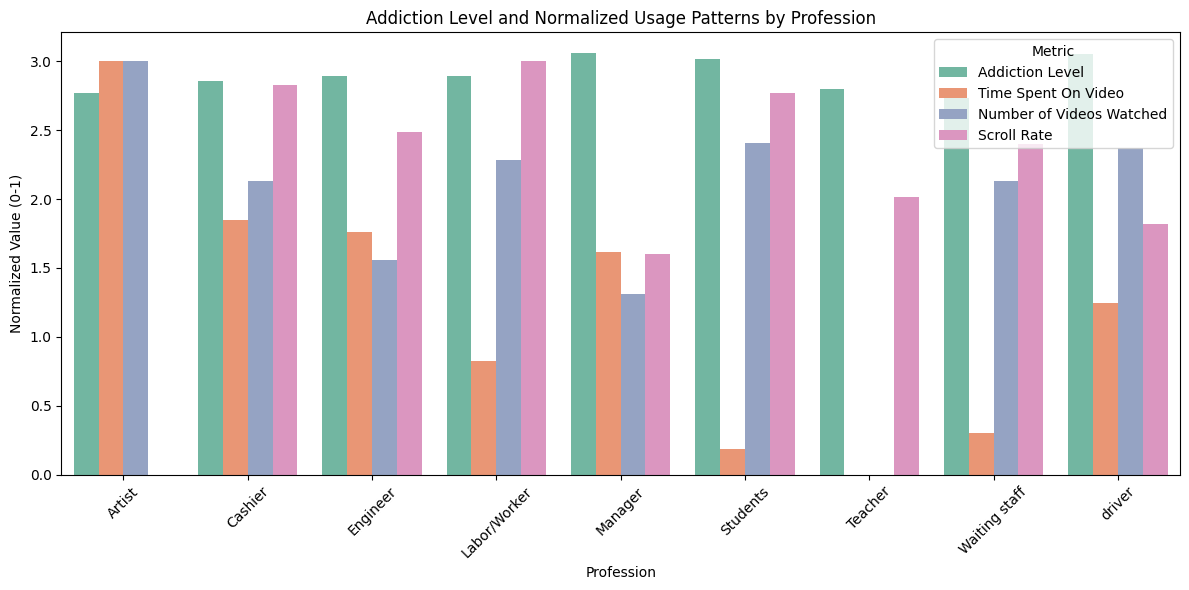

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Group by Profession and calculate the average for each metric
profession_avg = data.groupby('Profession').agg({
    'Addiction Level': 'mean',
    'Time Spent On Video': 'mean',
    'Number of Videos Watched': 'mean',
    'Scroll Rate': 'mean'
}).reset_index()

# Normalize each column (min-max scaling to get values between 0 and 1)
metrics_to_normalize = ['Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate']
metrics = ['Addiction Level', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate']
profession_avg[metrics_to_normalize] = profession_avg[metrics_to_normalize].apply(lambda x: ((x - x.min()) / (x.max() - x.min())) * 3)

# Melt the DataFrame to get it into a format suitable for grouped bar plotting
profession_avg_melted = pd.melt(profession_avg, id_vars='Profession', 
                                value_vars=metrics,
                                var_name='Metric', value_name='Value')

# Set up the grouped bar plot
plt.figure(figsize=(12, 6))

# Using a color palette where each profession has its own color
sns.barplot(x='Profession', y='Value', hue='Metric', data=profession_avg_melted, 
            palette=sns.color_palette("Set2", len(profession_avg['Profession'].unique())))

# Customize the plot
plt.title('Addiction Level and Normalized Usage Patterns by Profession')
plt.xlabel('Profession')
plt.ylabel('Normalized Value (0-1)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Metric')

# Display the plot
plt.tight_layout()
plt.show()


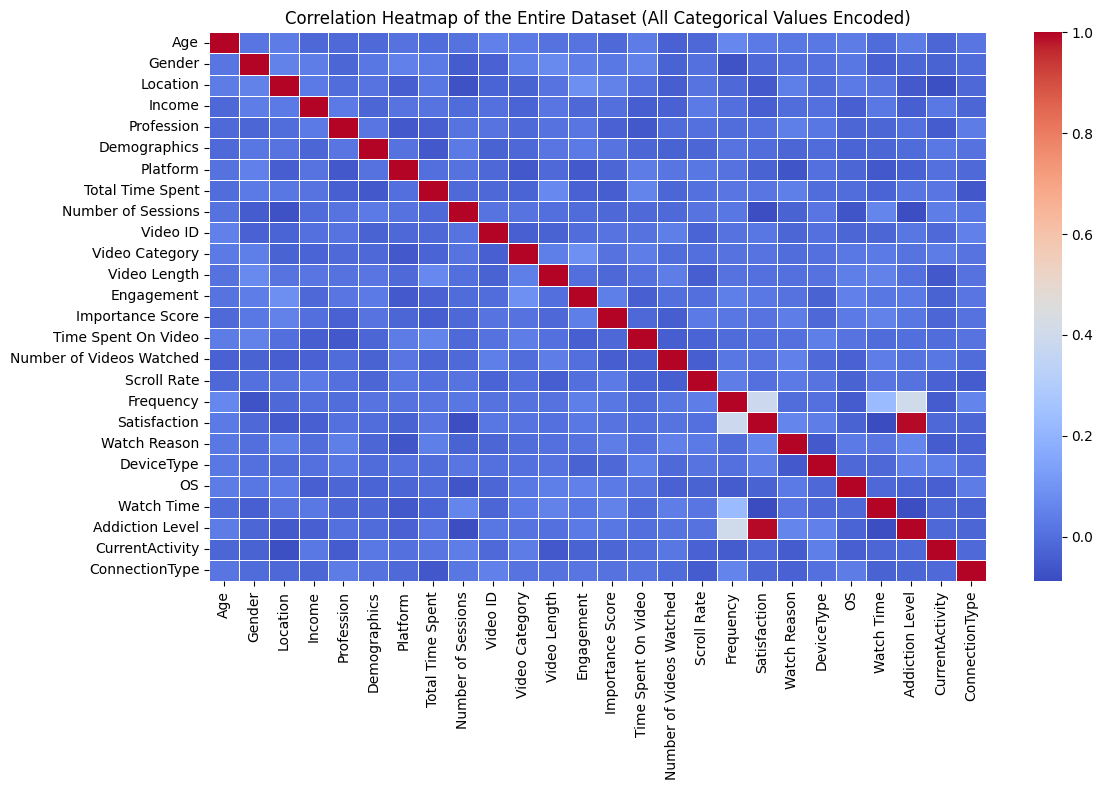

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Step 1: Drop the 'UserID' column if it exists
if 'UserID' in data.columns:
    data = data.drop('UserID', axis=1)

try:
    data = data.drop(columns = ['Self Control', 'ProductivityLoss'])
except:
    print("column is not present")

# Step 2: Create a dictionary to store the LabelEncoder for each column
label_encoders = {}

# Step 3: Encode all non-numeric columns with unique numeric values and store encoders
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save the LabelEncoder for reversing later

# Step 4: Select only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['number'])

# Step 5: Calculate the correlation matrix for the numerical columns
correlation_matrix = numerical_data.corr()

# Step 6: Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Customize the plot
plt.title('Correlation Heatmap of the Entire Dataset (All Categorical Values Encoded)')
plt.tight_layout()

# Display the heatmap
plt.show()

# Step 7: Function to reverse the encoding of a specific column
def reverse_encoding(column_name, encoded_data):
    if column_name in label_encoders:
        le = label_encoders[column_name]
        return le.inverse_transform(encoded_data)
    else:
        print(f"No encoding found for column: {column_name}")
        return None
    


In [87]:
data

,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,Total Time Spent,Number of Sessions,Video ID,Video Category,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,Frequency,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Addiction Level,CurrentActivity,ConnectionType
0,56,1,6,82812,True,True,2,0,1,80,17,4229,6,24,7867,5,26,22,87,3,7,3,1,0,13,5,3,0
1,46,0,5,27999,False,True,0,1,1,228,14,2131,6,19,5944,6,25,31,46,0,5,2,0,0,6,3,1,1
2,32,0,8,42436,False,True,2,0,0,30,6,4367,8,19,8674,3,9,7,88,1,4,1,2,0,2,2,0,0
3,60,1,0,62963,True,False,7,0,3,101,19,1507,8,4,2477,2,6,41,93,3,7,2,1,0,13,5,3,0
4,25,1,6,22096,False,True,4,1,2,136,6,2159,3,19,3093,7,13,21,4,2,2,0,1,3,11,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,1,2,74254,True,True,5,0,2,144,7,6168,3,1,5179,6,17,17,47,0,1,3,1,3,7,0,2,0
996,40,0,6,27006,False,False,7,1,0,231,15,2794,5,2,1803,4,2,17,15,3,2,0,1,1,0,0,0,0
997,27,1,2,94218,True,True,7,0,2,165,1,2893,6,12,9290,3,9,28,44,3,1,3,1,3,0,0,3,0
998,61,1,6,85344,True,False,5,1,3,151,11,1199,5,15,2050,5,12,30,62,3,7,3,1,1,0,5,2,1


In [88]:
correlation_with_addiction = correlation_matrix['Addiction Level'].drop('Addiction Level')

# Step 3: Sort the correlations in descending order
most_correlated_features = correlation_with_addiction.sort_values(ascending=False)

# Step 4: Print the most correlated features with 'Addiction Level'
print("Features most correlated with Addiction Level:")
print(most_correlated_features)

Features most correlated with Addiction Level:
Satisfaction                0.994939
Frequency                   0.403106
Watch Reason                0.060797
DeviceType                  0.044388
Age                         0.033493
Engagement                  0.027620
Video ID                    0.020655
Importance Score            0.018474
Total Time Spent            0.016086
Number of Videos Watched    0.013286
Video Category              0.012068
Scroll Rate                 0.006758
Video Length                0.004914
Profession                  0.004585
Time Spent On Video        -0.000447
Demographics               -0.010187
CurrentActivity            -0.015728
Gender                     -0.022084
ConnectionType             -0.023546
OS                         -0.024765
Platform                   -0.034367
Income                     -0.039181
Location                   -0.051519
Number of Sessions         -0.080961
Watch Time                 -0.082738
Name: Addiction Level, dtype

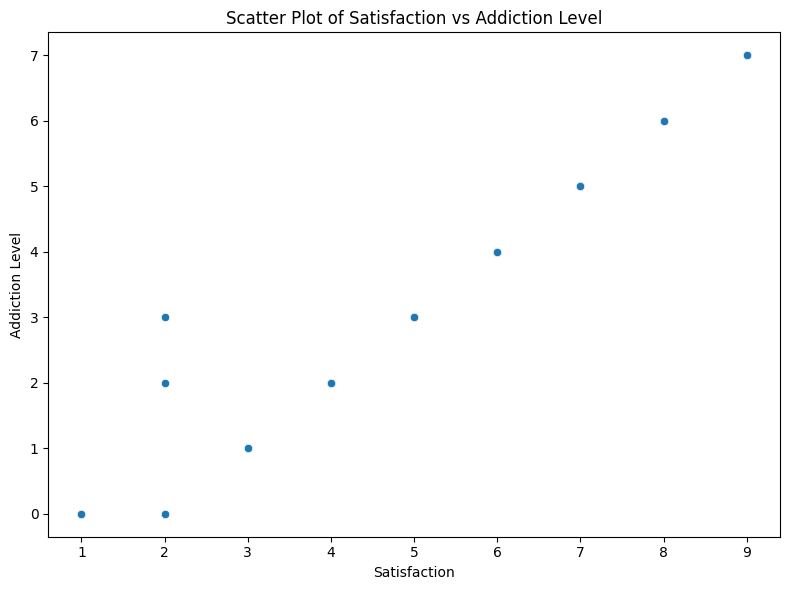

,Satisfaction,Addiction Level
0,7,5
1,5,3
2,4,2
3,7,5
4,2,0
...,...,...
995,1,0
996,2,0
997,1,0
998,7,5


In [91]:


# Set up the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Satisfaction', y='Addiction Level', data=data)

# Customize the plot
plt.title('Scatter Plot of Satisfaction vs Addiction Level')
plt.xlabel('Satisfaction')
plt.ylabel('Addiction Level')

# Display the plot
plt.tight_layout()
plt.show()


data[['Satisfaction', 'Addiction Level']]

We might dis-include satisfcation from any regression model, it makes the challenge too easy because it's correlation is so high. Also, because this is a synthetic dataset, it seems like this might have been an error. The other distributions match up and make more sense though.